# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
bouy_data = pd.read_csv("drive/My Drive/Projects/PlastOPol/Datasets/bouy_observed.csv")
bouy_data

,time,ahDischargedLithium,airHumidity,airPressure,airTemperature,batteryVoltage,chlorophyll000,currDir001,currSp001,hm0,hmax,irradiance,latitude,longitude,mdir,temperature000,thtp,tp,ts,windDirection,windSpeed,size
0,2018-02-21 16:00:00,8.500,79.688,1013.0859,19.2188,11.5938,0.000,215.8594,23.29102,3.750,5.6250,23.438,70.647888,-15.409698,206.7188,-0.18457,229.2188,14.6484,11.4219,257.3438,10.0781,1
1,2018-02-21 17:00:00,8.500,78.125,1012.1094,19.6875,11.5547,0.000,153.2813,8.12988,3.438,4.8047,23.438,70.647888,-15.408173,199.6875,-0.18457,232.0313,14.4141,11.0820,254.5313,11.7188,1
2,2018-02-21 18:00:00,8.500,82.813,1011.1328,17.6563,11.5547,0.000,202.5000,14.42871,3.750,5.3906,23.438,70.647430,-15.408173,184.2188,-0.19531,230.6250,14.0625,9.3828,261.5625,12.1875,1
3,2018-02-21 19:00:00,8.500,81.250,1009.1797,16.0938,11.5547,0.000,250.3125,14.50195,3.438,5.1563,23.438,70.647430,-15.412750,167.3438,-0.18994,223.5938,16.0547,8.3633,251.7188,12.8906,1
4,2018-02-21 20:00:00,8.500,93.750,1008.2031,16.8750,11.5547,0.000,156.0938,8.42285,3.750,5.5078,23.438,70.646973,-15.418854,150.4688,-0.18457,146.2500,7.3828,7.9102,250.3125,13.5938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,2018-05-06 03:00:00,172.125,75.000,986.7188,0.9375,12.6094,6.250,44.2969,45.77637,2.813,3.8672,0.000,71.188507,-15.463104,181.4063,0.17529,180.0000,7.3828,6.8906,334.6875,11.0156,1
1759,2018-05-06 04:00:00,172.125,76.563,986.7188,0.9375,12.6484,3.125,40.7813,39.55078,2.813,4.9219,46.875,71.208191,-15.420380,187.0313,0.15381,175.7813,8.3203,7.2305,344.5313,11.2500,1
1760,2018-05-06 05:00:00,172.125,79.688,986.7188,1.0938,12.8047,3.125,26.7188,34.86328,3.125,5.2734,117.188,71.227875,-15.379181,188.4375,0.15381,180.0000,8.2031,7.3438,340.3125,11.2500,1
1761,2018-05-06 06:00:00,172.125,79.688,986.7188,2.1875,13.2734,3.125,43.5938,40.64941,3.125,4.5703,117.188,71.248016,-15.343323,184.2188,0.16992,187.0313,7.6172,7.6836,333.2813,11.2500,1


In [ ]:
bouy_data = bouy_data.drop(columns=['ahDischargedLithium', 'airHumidity', 'airPressure',
       'airTemperature', 'batteryVoltage', 'chlorophyll000', 'hm0', 'hmax', 'irradiance', 'mdir', 'temperature000', 'thtp', 'tp', 'ts', 'size'])

In [ ]:
bouy_data.head()

,time,currDir001,currSp001,latitude,longitude,windDirection,windSpeed
0,2018-02-21 16:00:00,215.8594,23.29102,70.647888,-15.409698,257.3438,10.0781
1,2018-02-21 17:00:00,153.2813,8.12988,70.647888,-15.408173,254.5313,11.7188
2,2018-02-21 18:00:00,202.5000,14.42871,70.647430,-15.408173,261.5625,12.1875
3,2018-02-21 19:00:00,250.3125,14.50195,70.647430,-15.412750,251.7188,12.8906
4,2018-02-21 20:00:00,156.0938,8.42285,70.646973,-15.418854,250.3125,13.5938


In [ ]:
bouy_data = bouy_data[-85:]

In [ ]:
bouy_data["currSpx"] = bouy_data["currSp001"]*np.cos(bouy_data["currDir001"]) 
bouy_data["currSpy"] = bouy_data["currSp001"]*np.sin(bouy_data["currDir001"]) 

bouy_data["windSpeedx"] = bouy_data["windSpeed"]*np.cos(bouy_data["windDirection"]) 
bouy_data["windSpeedy"] = bouy_data["windSpeed"]*np.sin(bouy_data["windDirection"]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# bouy_data = bouy_data.drop(columns=["currDir001", "windDirection"])
bouy_data = bouy_data.drop(columns=["currDir001", "windDirection", "currSp001", "windSpeed"])

In [ ]:
bouy_data

,time,latitude,longitude,currSpx,currSpy,windSpeedx,windSpeedy
1678,2018-05-02 19:00:00,70.649261,-15.453186,-25.429629,2.593313,2.567535,4.471598
1679,2018-05-02 20:00:00,70.653839,-15.473785,-15.290464,-12.655822,1.960019,4.258049
1680,2018-05-02 21:00:00,70.656586,-15.492096,-12.745607,13.248141,-0.576010,4.179292
1681,2018-05-02 22:00:00,70.657043,-15.514221,16.131623,-16.288560,0.190520,4.449023
1682,2018-05-02 23:00:00,70.655212,-15.538635,-15.039795,-17.301763,-2.703980,4.663374
...,...,...,...,...,...,...,...
1758,2018-05-06 03:00:00,71.188507,-15.463104,43.529636,14.164987,-1.186085,10.951559
1759,2018-05-06 04:00:00,71.208191,-15.420380,-39.481015,2.348113,5.657176,-9.724138
1760,2018-05-06 05:00:00,71.227875,-15.379181,-0.532078,34.859220,5.883136,9.589119
1761,2018-05-06 06:00:00,71.248016,-15.343323,37.620191,-15.397915,10.834951,3.027595


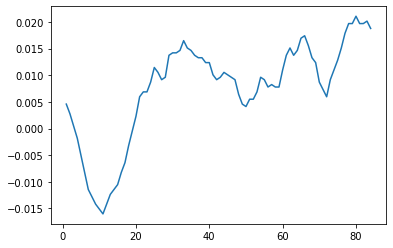

In [ ]:
plt.plot(range(len(bouy_data)),bouy_data["latitude"].diff())

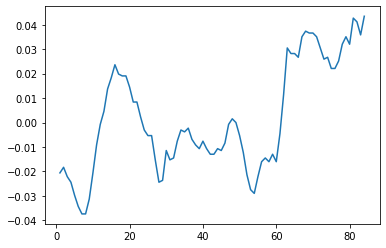

In [ ]:
plt.plot(range(len(bouy_data)),bouy_data["longitude"].diff())

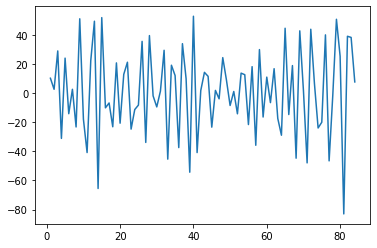

In [ ]:
plt.plot(range(len(bouy_data)),bouy_data["currSpx"].diff())

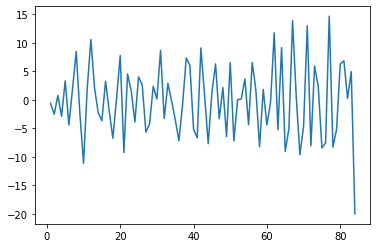

In [ ]:
plt.plot(range(len(bouy_data)),bouy_data["windSpeedx"].diff())

# Experiment 2 Using Differences

In [ ]:
dataset = bouy_data.copy()
dataset = dataset.set_index("time")

In [ ]:
# Saving trouble for later
original_features = dataset[["currSpx", "currSpy", "windSpeedx", "windSpeedy"]]
original_results = dataset[["latitude", "longitude"]]

In [ ]:
## Conversion of data values to Differences  

# current speed
dataset["currSpx"] = dataset["currSpx"].diff()
dataset["currSpy"] = dataset["currSpy"].diff()

# windspeed
dataset["windSpeedx"] = dataset["windSpeedx"].diff()
dataset["windSpeedy"] = dataset["windSpeedy"].diff()

# latitude
dataset["latitude"] = dataset["latitude"].diff()

# longitude
dataset["longitude"] = dataset["longitude"].diff()


scaler = MinMaxScaler(feature_range = (0, 1))

dataset_scaled = scaler.fit_transform(dataset.values[1:, :])

## Division into test and train data
train_size = int(len(dataset_scaled) * 0.70)
test_size = len(dataset_scaled) - train_size

train_inputs = dataset_scaled[0:train_size,2:]
test_inputs = dataset_scaled[train_size:,2:]

train_outputs = dataset_scaled[0:train_size,[0, 1]]
test_outputs = dataset_scaled[train_size:-1,[0, 1]]

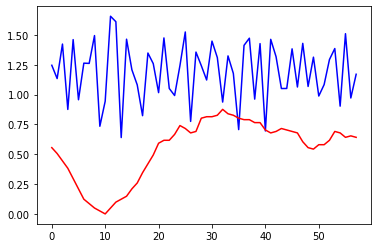

In [ ]:
plt.plot(range(train_size), train_inputs[:,0] + train_inputs[:,2], "b")
# plt.plot(range(train_size), train_inputs[:,2], "g")
plt.plot(range(train_size), train_outputs[:,0], "r")

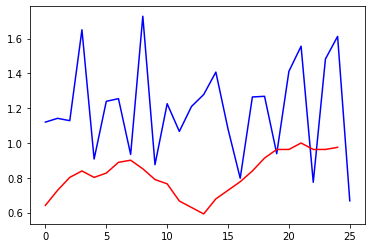

In [ ]:
plt.plot(range(test_size), test_inputs[:,0] + test_inputs[:,2], "b")
# plt.plot(range(train_size), train_inputs[:,2], "g")
plt.plot(range(test_size-1), test_outputs[:,0], "r")

In [ ]:
time_stemp = 10
time_step_future = 1
dataX = []
dataY = []
for i in range(len(train_inputs)-time_stemp-time_step_future):
    a = train_inputs[i:(i+time_stemp),:]
    dataX.append(a)
    dataY.append(train_outputs[i + time_stemp: i + time_stemp + time_step_future, :])
trainX = np.array(dataX)
trainY = np.array(dataY)  

dataX = []
dataY = []
for i in range(len(test_inputs)-time_stemp-time_step_future):
    a = test_inputs[i:(i+time_stemp),:]
    dataX.append(a)
    dataY.append(test_outputs[i + time_stemp: i + time_stemp + time_step_future, :])
testX = np.array(dataX)
testY = np.array(dataY) 



print('shape of trainX: ', trainX.shape)
print('shape of testX: ', testX.shape)
print('shape of trainY: ', trainY.shape)
print('shape of testY: ', testY.shape)

shape of trainX:  (47, 10, 4)
shape of testX:  (15, 10, 4)
shape of trainY:  (47, 1, 2)
shape of testY:  (15, 1, 2)


In [ ]:
# Importing the Keras libraries and packages
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(LSTM(units = 200,activation='relu', return_sequences = True , input_shape = (trainX.shape[1], trainX.shape[2])))
regressor.add(Dropout(0.3))

# # # # Adding a second RNN layer and some Dropout regularisation
regressor.add(LSTM(units = 100,activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

# # Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 10, return_sequences = False ))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 2))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mae')

callback = EarlyStopping(monitor="val_loss",
                                            min_delta=0,
                                            patience=100,
                                            verbose=3,
                                            mode="auto",
                                            baseline=None,
                                            restore_best_weights=False,)

# Fitting the RNN to the Training set
history = regressor.fit(trainX, trainY, 
                        epochs = 500, batch_size = 16, verbose=2, 
                        validation_data = (testX, testY), callbacks=[callback], shuffle=False)

Epoch 1/500
3/3 - 4s - loss: 0.4714 - val_loss: 0.6741 - 4s/epoch - 1s/step
Epoch 2/500
3/3 - 0s - loss: 0.3253 - val_loss: 0.5203 - 121ms/epoch - 40ms/step
Epoch 3/500
3/3 - 0s - loss: 0.2246 - val_loss: 0.3940 - 124ms/epoch - 41ms/step
Epoch 4/500
3/3 - 0s - loss: 0.2454 - val_loss: 0.3368 - 121ms/epoch - 40ms/step
Epoch 5/500
3/3 - 0s - loss: 0.2544 - val_loss: 0.3526 - 121ms/epoch - 40ms/step
Epoch 6/500
3/3 - 0s - loss: 0.2075 - val_loss: 0.4007 - 129ms/epoch - 43ms/step
Epoch 7/500
3/3 - 0s - loss: 0.2632 - val_loss: 0.4288 - 124ms/epoch - 41ms/step
Epoch 8/500
3/3 - 0s - loss: 0.2321 - val_loss: 0.4332 - 137ms/epoch - 46ms/step
Epoch 9/500
3/3 - 0s - loss: 0.2185 - val_loss: 0.4338 - 122ms/epoch - 41ms/step
Epoch 10/500
3/3 - 0s - loss: 0.2002 - val_loss: 0.4306 - 125ms/epoch - 42ms/step
Epoch 11/500
3/3 - 0s - loss: 0.2078 - val_loss: 0.4201 - 124ms/epoch - 41ms/step
Epoch 12/500
3/3 - 0s - loss: 0.1921 - val_loss: 0.3907 - 124ms/epoch - 41ms/step
Epoch 13/500
3/3 - 0s - loss: 

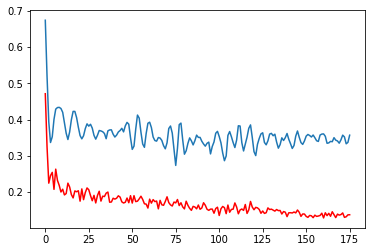

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 200)           164000    
                                                                 
 dropout_3 (Dropout)         (None, 10, 200)           0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 100)           120400    
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                1110      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [ ]:
import math 
from sklearn.metrics import mean_squared_error

trainPredict = regressor.predict(trainX)
testPredict = regressor.predict(testX)
# invert predictions
trainPredict = trainPredict.reshape(trainY.shape[0], trainY.shape[2])
temp = np.zeros((trainY.shape[0], dataset_scaled.shape[1]))
temp[:,0:2] = trainPredict
trainPredict = temp
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = trainPredict[:,0:2]
print(trainPredict.shape)

# reshaping back

trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])
temp = np.zeros((trainY.shape[0], dataset_scaled.shape[1]))
temp[:,0:2] = trainY
trainY = temp
trainY = scaler.inverse_transform(trainY)
trainY = trainY[:,0:2]
print(trainY.shape)

testPredict = testPredict.reshape(testY.shape[0], testY.shape[2])
temp = np.zeros((testPredict.shape[0], dataset_scaled.shape[1]))
temp[:,0:2] = testPredict
testPredict = temp
testPredict = scaler.inverse_transform(testPredict)
testPredict = testPredict[:,0:2]
print(testPredict.shape)

# reshaping back

testY = testY.reshape(testY.shape[0], testY.shape[2])
temp = np.zeros((testY.shape[0], dataset_scaled.shape[1]))
temp[:,0:2] = testY
testY = temp
testY = scaler.inverse_transform(testY)
testY = testY[:,0:2]
print(testY.shape)


# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

(47, 2)
(47, 2)
(15, 2)
(15, 2)
Train Score: 0.01 RMSE
Test Score: 0.02 RMSE


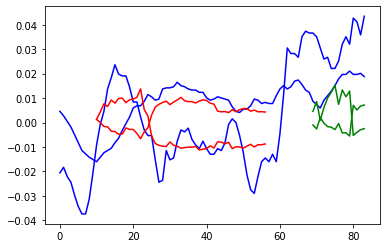

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(dataset_scaled[:,:2])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset_scaled[:,:2])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+2:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset_scaled)[:,0:2], color='b')
plt.plot(trainPredictPlot, color='r')
plt.plot(testPredictPlot, color='g')
plt.show()

In [ ]:
plot_data = bouy_data.copy()
plot_data["pred_lat"] = np.zeros(len(plot_data))
plot_data["pred_lon"] = np.zeros(len(plot_data))

print(trainPredict.shape)
print(len(plot_data[1:train_size-time_stemp]))

plot_data["pred_lat"][1:train_size-time_stemp] = trainPredict[:,0]
plot_data["pred_lat"][train_size+time_stemp+2:] = testPredict[:,0]

plot_data["pred_lon"][1:train_size-time_stemp] = trainPredict[:,1]
plot_data["pred_lon"][train_size+time_stemp+2:] = testPredict[:,1]

plot_data

(47, 2)
47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying

,time,latitude,longitude,currSpx,currSpy,windSpeedx,windSpeedy,pred_lat,pred_lon
1678,2018-05-02 19:00:00,70.649261,-15.453186,-25.429629,2.593313,2.567535,4.471598,0.000000,0.000000
1679,2018-05-02 20:00:00,70.653839,-15.473785,-15.290464,-12.655822,1.960019,4.258049,0.001295,0.001320
1680,2018-05-02 21:00:00,70.656586,-15.492096,-12.745607,13.248141,-0.576010,4.179292,0.000001,0.004347
1681,2018-05-02 22:00:00,70.657043,-15.514221,16.131623,-16.288560,0.190520,4.449023,-0.001611,0.007665
1682,2018-05-02 23:00:00,70.655212,-15.538635,-15.039795,-17.301763,-2.703980,4.663374,-0.001770,0.006562
...,...,...,...,...,...,...,...,...,...
1758,2018-05-06 03:00:00,71.188507,-15.463104,43.529636,14.164987,-1.186085,10.951559,-0.005515,0.012866
1759,2018-05-06 04:00:00,71.208191,-15.420380,-39.481015,2.348113,5.657176,-9.724138,0.007068,-0.005291
1760,2018-05-06 05:00:00,71.227875,-15.379181,-0.532078,34.859220,5.883136,9.589119,0.005153,-0.003967
1761,2018-05-06 06:00:00,71.248016,-15.343323,37.620191,-15.397915,10.834951,3.027595,0.006778,-0.002936


In [ ]:
print(original_results["latitude"][0])
plot_data["pred_lat"].iloc[0] = original_results["latitude"][0]
plot_data["pred_lon"].iloc[0] = original_results["longitude"][0]

print(plot_data["pred_lat"].iloc[0])
plot_data["pred_lat"] = plot_data["pred_lat"].cumsum()
plot_data["pred_lon"] = plot_data["pred_lon"].cumsum()
# print(plot_data["pred_lat"][0])
plot_data

70.649261
70.649261


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,time,latitude,longitude,currSpx,currSpy,windSpeedx,windSpeedy,pred_lat,pred_lon
1678,2018-05-02 19:00:00,70.649261,-15.453186,-25.429629,2.593313,2.567535,4.471598,70.649261,-15.453186
1679,2018-05-02 20:00:00,70.653839,-15.473785,-15.290464,-12.655822,1.960019,4.258049,70.650556,-15.451866
1680,2018-05-02 21:00:00,70.656586,-15.492096,-12.745607,13.248141,-0.576010,4.179292,70.650557,-15.447519
1681,2018-05-02 22:00:00,70.657043,-15.514221,16.131623,-16.288560,0.190520,4.449023,70.648946,-15.439854
1682,2018-05-02 23:00:00,70.655212,-15.538635,-15.039795,-17.301763,-2.703980,4.663374,70.647176,-15.433292
...,...,...,...,...,...,...,...,...,...
1758,2018-05-06 03:00:00,71.188507,-15.463104,43.529636,14.164987,-1.186085,10.951559,70.795518,-15.537494
1759,2018-05-06 04:00:00,71.208191,-15.420380,-39.481015,2.348113,5.657176,-9.724138,70.802586,-15.542785
1760,2018-05-06 05:00:00,71.227875,-15.379181,-0.532078,34.859220,5.883136,9.589119,70.807739,-15.546752
1761,2018-05-06 06:00:00,71.248016,-15.343323,37.620191,-15.397915,10.834951,3.027595,70.814517,-15.549688


In [ ]:
plot_data["drifter_num"] = 1

plot_data2 = plot_data.copy()

plot_data2["latitude"] = plot_data2["pred_lat"]
plot_data2["longitude"] = plot_data2["pred_lon"]
plot_data2["drifter_num"] = 2

plot_data = plot_data.drop(columns=["pred_lat", "pred_lon", "currSpx", "currSpy", "windSpeedx", "windSpeedy"])
plot_data2 = plot_data2.drop(columns=["pred_lat", "pred_lon", "currSpx", "currSpy", "windSpeedx", "windSpeedy"])


plot_data_f = pd.concat([plot_data, plot_data2])

In [ ]:

overall_err_lat = math.sqrt(mean_squared_error(plot_data["latitude"], plot_data2["latitude"]))
print('Error in Latitude : %.2f RMSE' % (overall_err_lat))
overall_err_lon = math.sqrt(mean_squared_error(plot_data["longitude"], plot_data2["longitude"]))
print('Error in Latitude : %.2f RMSE' % (overall_err_lon))

Error in Latitude : 0.17 RMSE
Error in Latitude : 0.23 RMSE


In [ ]:
import numpy as np                   # for multi-dimensional containers 
import pandas as pd                  # for DataFrames
import plotly.graph_objects as go    # for data visualisation
import plotly.express as px

path_to_key = '/content/drive/My Drive/Projects/MapBox/mapboxkey.txt'

with open(path_to_key) as f:
    contents = f.readlines()

access_token = contents[0]
px.set_mapbox_access_token(access_token)

plot_data_f['size'] = 1

fig = px.scatter_mapbox(
    plot_data_f, lat="latitude", lon="longitude",
    size="size", size_max=5,
    color="drifter_num", color_continuous_scale=px.colors.sequential.Pinkyl,
    hover_name="time",           
    mapbox_style='light', zoom=5
)

fig.layout.coloraxis.showscale = False

fig.show()